## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Explanation of columns

- Pregnancies
    - Total number of pregnancies
- Glucose
    - Plasma glucose concentration in 2 hours in an oral glucose tolerance test
- Blood Pressure
    - Diastolic blood pressure (mmHg)
- Skin Thickness
    - Triceps fold skin thickness (mm)
- Insulin
    - 2-Hour serum insulin (mu U/ml)
- BMI
    - Body mass index (weight in kg/(height in m)^2)
- Diabetes Pedigree Function
    - A function which scores likelihood of diabetes based on family history
- Age
    - Age in years
- Outcome
    - 0=Does not have diabetes; 1=Does have diabetes

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
dups = df.duplicated()
dups
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 0, '0=No diabetes, 1=Has diabetes')

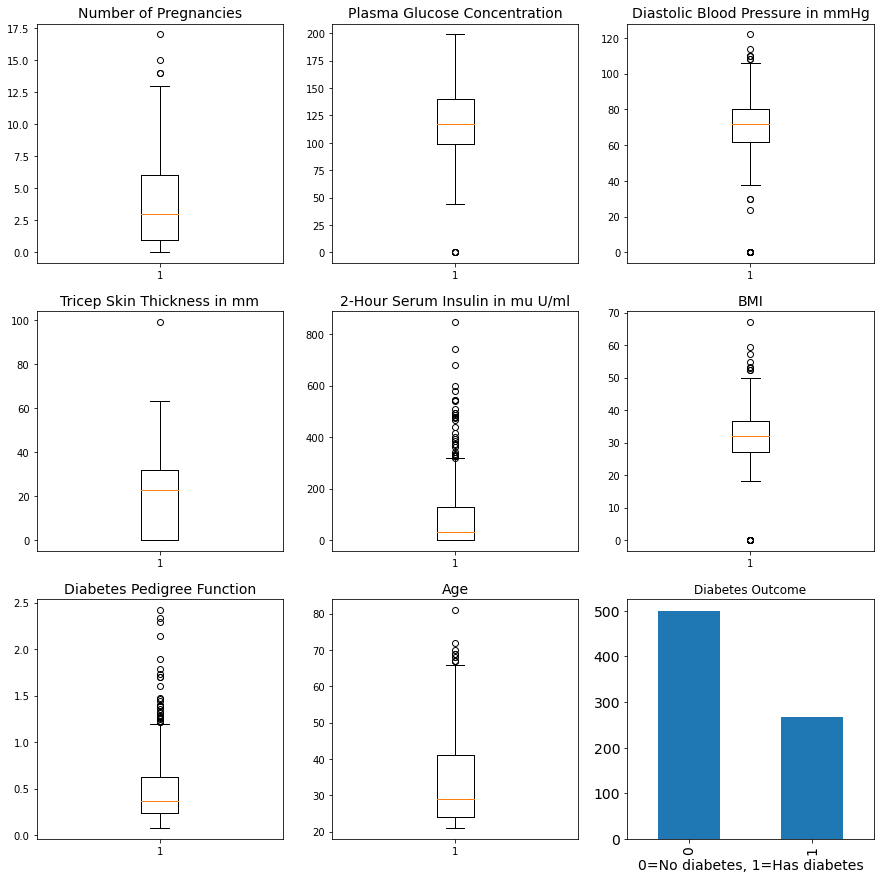

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))

axs[0][0].boxplot(df['Pregnancies'])
axs[0][0].set_title('Number of Pregnancies', fontsize=14)
axs[0][1].boxplot(df['Glucose'])
axs[0][1].set_title('Plasma Glucose Concentration', fontsize=14)
axs[0][2].boxplot(df['BloodPressure'])
axs[0][2].set_title('Diastolic Blood Pressure in mmHg', fontsize=14)
axs[1][0].boxplot(df['SkinThickness'])
axs[1][0].set_title('Tricep Skin Thickness in mm', fontsize=14)
axs[1][1].boxplot(df['Insulin'])
axs[1][1].set_title('2-Hour Serum Insulin in mu U/ml', fontsize=14)
axs[1][2].boxplot(df['BMI'])
axs[1][2].set_title('BMI', fontsize=14)
axs[2][0].boxplot(df['DiabetesPedigreeFunction'])
axs[2][0].set_title('Diabetes Pedigree Function', fontsize=14)
axs[2][1].boxplot(df['Age'])
axs[2][1].set_title('Age', fontsize=14)
by_outcome = df.groupby('Outcome')
by_outcome.size().plot(ax=axs[2][2], kind='bar', title='Diabetes Outcome', fontsize=14)
axs[2][2].set_xlabel('0=No diabetes, 1=Has diabetes', fontsize=14)

## Data Preprocessing

In [10]:
dups = df.duplicated()
dups
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df[['Outcome']]

In [12]:
# Normalize
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [13]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

trainx = train_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
testx = test_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

trainY = train_df[['Outcome']]
testY = test_df[['Outcome']]

## Data Exploration and Visualization

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

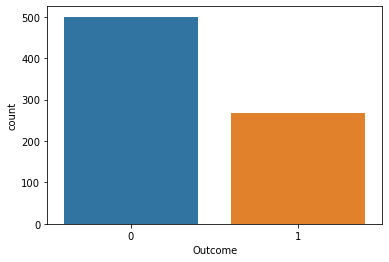

In [15]:
sns.countplot(x='Outcome', data=df)
plt.show()

In [16]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


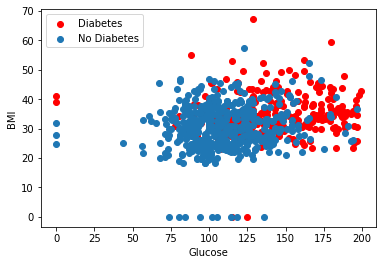

In [17]:
plt.scatter(x=df.Glucose[df.Outcome==1], y=df.BMI[(df.Outcome==1)], c="red")
plt.scatter(x=df.Glucose[df.Outcome==0], y=df.BMI[(df.Outcome==0)])
plt.legend(["Diabetes", "No Diabetes"])
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

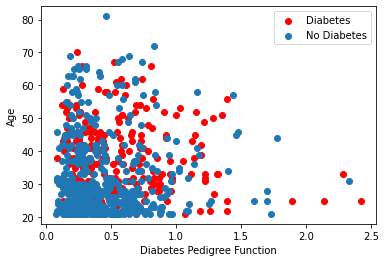

In [18]:
plt.scatter(x=df.DiabetesPedigreeFunction[df.Outcome==1], y=df.Age[(df.Outcome==1)], c="red")
plt.scatter(x=df.DiabetesPedigreeFunction[df.Outcome==0], y=df.Age[(df.Outcome==0)])
plt.legend(["Diabetes", "No Diabetes"])
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Age")
plt.show()

## Data Models

### Decision Tree

Accuracy on Decision Tree test data is 0.68


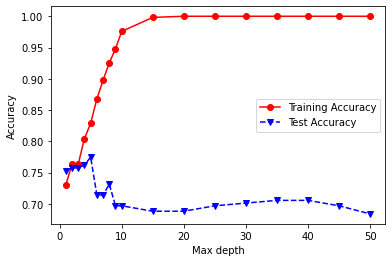

In [19]:
maxdepths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

DTtrainAcc = []
DTtestAcc = []

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(trainx, trainY)                           
    DT_Y_predTrain = clf.predict(trainx)                      
    DT_Y_predTest = clf.predict(testx)                          
    DTtrainAcc.append(accuracy_score(trainY, DT_Y_predTrain))   
    DTtestAcc.append(accuracy_score(testY, DT_Y_predTest))                                                   

plt.plot(maxdepths,DTtrainAcc,'ro-',maxdepths,DTtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

print('Accuracy on Decision Tree test data is %.2f' % (accuracy_score(testY, DT_Y_predTest)))

### K-Nearest Neighbor

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y

Accuracy on KNN test data is 0.78


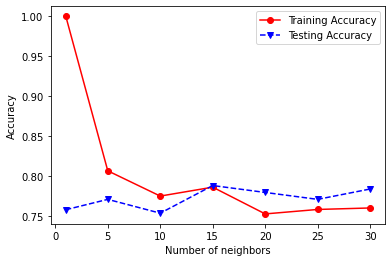

In [20]:
numberNeighbors = [1, 5, 10, 15, 20, 25, 30]

KNNtrainAcc = []
KNNtestAcc = []
    
for k in numberNeighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(trainx, trainY)
    KNN_Y_PredTrain = classifier.predict(trainx)
    KNN_Y_PredTest = classifier.predict(testx)
    KNNtrainAcc.append(accuracy_score(trainY, KNN_Y_PredTrain))
    KNNtestAcc.append(accuracy_score(testY, KNN_Y_PredTest))

plt.plot(numberNeighbors, KNNtrainAcc, 'ro-', numberNeighbors, KNNtestAcc, 'bv--')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print('Accuracy on KNN test data is %.2f' % (accuracy_score(testY, KNN_Y_PredTest)))

### Logistic Regression and SVC (linear and non-linear)

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Accuracy on Logistic Reg. test data is 0.68
Accuracy on Linear SVC test data is 0.68
Accuracy on Non-Linear SVC test data is 0.68


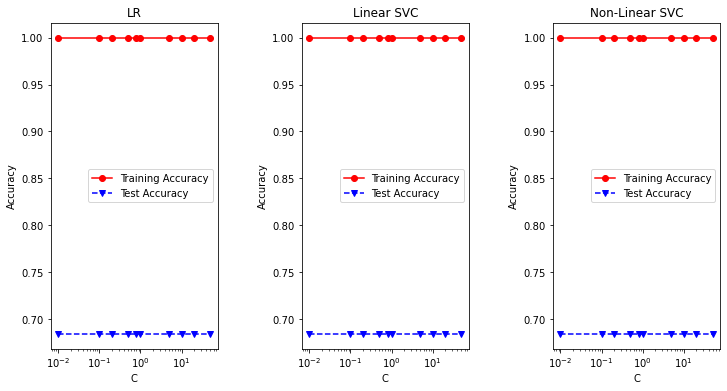

In [21]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []
SVCtrainAcc = []
SVCtestAcc = []
nSVCtrainAcc = []
nSVCtestAcc = []

for param in C:
    LRclf = linear_model.LogisticRegression(C=param)            
    LRclf.fit(trainx, trainY)                                   
    LR_Y_predTrain = clf.predict(trainx)                          
    LR_Y_predTest = clf.predict(testx)                             
    LRtrainAcc.append(accuracy_score(trainY, LR_Y_predTrain))    
    LRtestAcc.append(accuracy_score(testY, LR_Y_predTest))        

    SVCclf = SVC(C=param,kernel='linear')                        
    SVCclf.fit(trainx, trainY)                                   
    SVC_Y_predTrain = clf.predict(trainx)                           
    SVC_Y_predTest = clf.predict(testx)                             
    SVCtrainAcc.append(accuracy_score(trainY, SVC_Y_predTrain))  
    SVCtestAcc.append(accuracy_score(testY, SVC_Y_predTest))
    
    nSVCclf = SVC(C=param,kernel='rbf',gamma='auto')                        
    nSVCclf.fit(trainx, trainY)                                   
    nSVC_Y_predTrain = clf.predict(trainx)                           
    nSVC_Y_predTest = clf.predict(testx)                             
    nSVCtrainAcc.append(accuracy_score(trainY, nSVC_Y_predTrain))  
    nSVCtestAcc.append(accuracy_score(testY, nSVC_Y_predTest)) 
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_title('LR')
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVCtrainAcc, 'ro-', C, SVCtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_title('Linear SVC')
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

ax3.plot(C, nSVCtrainAcc, 'ro-', C, nSVCtestAcc, 'bv--')
ax3.legend(['Training Accuracy', 'Test Accuracy'])
ax3.set_title('Non-Linear SVC')
ax3.set_xlabel('C')
ax3.set_xscale('log')
ax3.set_ylabel('Accuracy')

print('Accuracy on Logistic Reg. test data is %.2f' % (accuracy_score(testY, LR_Y_predTest)))
print('Accuracy on Linear SVC test data is %.2f' % (accuracy_score(testY, SVC_Y_predTest)))
print('Accuracy on Non-Linear SVC test data is %.2f' % (accuracy_score(testY, nSVC_Y_predTest)))

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-22-87065504c5c2>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  EMclf.fit(trainx, trainY)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on Bagging test data is 0.79
Accuracy on Random Forest test data is 0.79
Accuracy on AdaBoost test data is 0.79


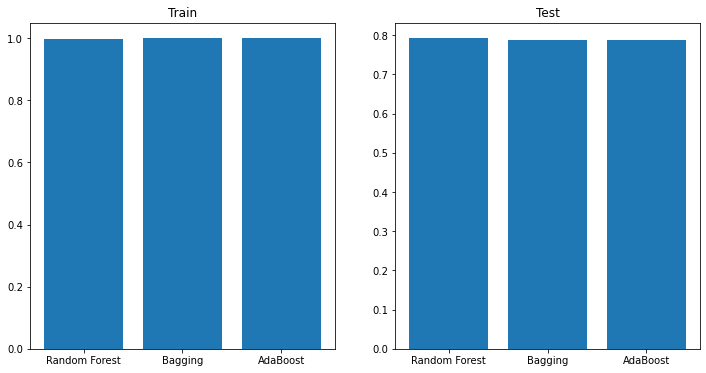

In [22]:
numBaseClassifiers = 500
EMmaxdepth = 10

EMtrainAcc = []
EMtestAcc = []

EMclf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=EMmaxdepth),n_estimators=numBaseClassifiers)
EMclf.fit(trainx, trainY)
EMBC_Y_predTrain = EMclf.predict(trainx)
EMBC_Y_predTest = EMclf.predict(testx)
EMtrainAcc.append(accuracy_score(trainY, EMBC_Y_predTrain))
EMtestAcc.append(accuracy_score(testY, EMBC_Y_predTest))

EMclf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
EMclf.fit(trainx, trainY)
EMRFC_Y_predTrain = EMclf.predict(trainx)
EMRFC_Y_predTest = EMclf.predict(testx)
EMtrainAcc.append(accuracy_score(trainY, EMRFC_Y_predTrain))
EMtestAcc.append(accuracy_score(testY, EMRFC_Y_predTest))

EMclf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=EMmaxdepth),n_estimators=numBaseClassifiers)
EMclf.fit(trainx, trainY)
EMABC_Y_predTrain = EMclf.predict(trainx)
EMABC_Y_predTest = EMclf.predict(testx)
EMtrainAcc.append(accuracy_score(trainY, EMABC_Y_predTrain))
EMtestAcc.append(accuracy_score(testY, EMABC_Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.bar([1.5,2.5,3.5], EMtrainAcc) 
ax1.set_xticks([1.5,2.5,3.5])     
ax1.set_xticklabels(methods)  
ax1.set_title('Train')

ax2.bar([1.5,2.5,3.5], EMtestAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.set_title('Test')

print('Accuracy on Bagging test data is %.2f' % (accuracy_score(testY, EMBC_Y_predTest)))
print('Accuracy on Random Forest test data is %.2f' % (accuracy_score(testY, EMRFC_Y_predTest)))
print('Accuracy on AdaBoost test data is %.2f' % (accuracy_score(testY, EMABC_Y_predTest)))

In [23]:
print('Accuracy on Decision Tree test data is %.2f' % (accuracy_score(testY, DT_Y_predTest)))
print('Accuracy on KNN test data is %.2f' % (accuracy_score(testY, KNN_Y_PredTest)))
print('Accuracy on Logistic Reg. test data is %.2f' % (accuracy_score(testY, LR_Y_predTest)))
print('Accuracy on Linear SVC test data is %.2f' % (accuracy_score(testY, SVC_Y_predTest)))
print('Accuracy on Non-Linear SVC test data is %.2f' % (accuracy_score(testY, nSVC_Y_predTest)))
print('Accuracy on Bagging test data is %.2f' % (accuracy_score(testY, EMBC_Y_predTest)))
print('Accuracy on Random Forest test data is %.2f' % (accuracy_score(testY, EMRFC_Y_predTest)))
print('Accuracy on AdaBoost test data is %.2f' % (accuracy_score(testY, EMABC_Y_predTest)))

Accuracy on Decision Tree test data is 0.68
Accuracy on KNN test data is 0.78
Accuracy on Logistic Reg. test data is 0.68
Accuracy on Linear SVC test data is 0.68
Accuracy on Non-Linear SVC test data is 0.68
Accuracy on Bagging test data is 0.79
Accuracy on Random Forest test data is 0.79
Accuracy on AdaBoost test data is 0.79
